In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#V1 = variance of wavelet transformed image
#V2 = skewness o Wavelet transformed image
#1372 instances, no missing values

#Describe the dataset: its size, number of features, datatypes, values, means and deviations
#Identify outliers
#Visualise Data
#Cluster

data = pd.read_csv('Forged Banknotes.csv')
data


,V1,V2
0,3.62160,8.66610
1,4.54590,8.16740
2,3.86600,-2.63830
3,3.45660,9.52280
4,0.32924,-4.45520
...,...,...
1367,0.40614,1.34920
1368,-1.38870,-4.87730
1369,-3.75030,-13.45860
1370,-3.56370,-8.38270


## Data types & statistics

In [1]:
v1 = data['V1']
v2 = data['V2']

print(v1)
print(v2)

NameError: name 'data' is not defined

In [42]:
var_1 = np.array(v1)
var_2 = np.array(v2)

data2 = np.array(data)

v1_mean = np.mean(var_1)
v2_mean = np.mean(var_2)

v1_std = np.std(var_1)
v2_std = np.std(var_2)

v1_min = np.min(var_1) 
v2_min =  np.min(var_2)

v1_max = np.max(var_1)
v2_max = np.max(var_2)

print('For V1: Mean:', round(v1_mean,2),', Std Dev:', round(v1_std,2), ', minimum:', round(v1_min,2), 'maximum:', round(v1_max,2))
print('For V2: Mean:', round(v2_mean,2),', Std Dev:', round(v2_std,2), ', minimum:', round(v2_min,2), 'maximum:', round(v2_max,2))

print('\n',var_1)
print(var_2,'\n')
print(data)

[[1.         0.26402553]
 [0.26402553 1.        ]]
For V1: Mean: 0.43 , Std Dev: 2.84 , minimum: -7.04 maximum: 6.82
For V2: Mean: 1.92 , Std Dev: 5.87 , minimum: -13.77 maximum: 12.95

 [ 3.6216  4.5459  3.866  ... -3.7503 -3.5637 -2.5419]
[  8.6661    8.1674   -2.6383  ... -13.4586   -8.3827   -0.65804] 

           V1        V2
0     3.62160   8.66610
1     4.54590   8.16740
2     3.86600  -2.63830
3     3.45660   9.52280
4     0.32924  -4.45520
...       ...       ...
1367  0.40614   1.34920
1368 -1.38870  -4.87730
1369 -3.75030 -13.45860
1370 -3.56370  -8.38270
1371 -2.54190  -0.65804

[1372 rows x 2 columns]


## Normalisation of the data

Given the high variability of the two variables, the data will be normalised according to the below formula:

                               x_normalised = (x - x_min)/(x_max - x_min) 
                             
The normalised data for V1 and V2, can be spotted below, alongside the normalised mean, standard deviation, min and max. 

The same names were used for the descriptive statistics. 

In [35]:
var1 = (var_1 - v1_min)/(v1_max - v1_min)
var2 = (var_2 - v2_min)/(v2_max - v2_min)

v1_mean = np.mean(var1)
v2_mean = np.mean(var2)

v1_std = np.std(var1)
v2_std = np.std(var2)

v1_min = np.min(var1) 
v2_min =  np.min(var2)

v1_max = np.max(var1)
v2_max = np.max(var2)

print('For V1: Mean:', round(v1_mean,2),', Std Dev:', round(v1_std,2), ', minimum:', round(v1_min,2), 'maximum:', round(v1_max,2))
print('For V2: Mean:', round(v2_mean,2),', Std Dev:', round(v2_std,2), ', minimum:', round(v2_min,2), 'maximum:', round(v2_max,2))

print(var1)
print(var2)

For V1: Mean: 0.54 , Std Dev: 0.2 , minimum: 0.0 maximum: 1.0
For V2: Mean: 0.59 , Std Dev: 0.22 , minimum: 0.0 maximum: 1.0
[0.76900389 0.83565902 0.78662859 ... 0.23738543 0.25084193 0.32452819]
[0.83964273 0.82098209 0.41664827 ... 0.01176814 0.20170105 0.49074676]


## Visualise the data

Text(0, 0.5, 'Skewness of WTI')

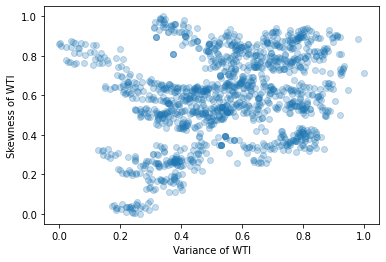

In [43]:
colormap = np.array([var1, var2])
plt.scatter(var1, var2, alpha = 0.25)  

plt.xlabel('Variance of WTI')
plt.ylabel('Skewness of WTI')

#print(var1,'/n')
#print(var2)

__*Below, you will find the statistics included in the graph:*__

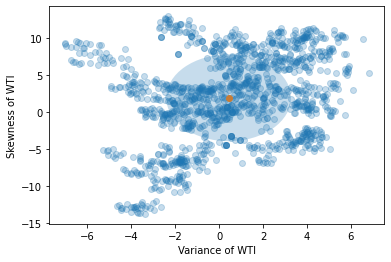

In [44]:
import matplotlib.patches as patches

mean = np.mean(data2,0) #column-wise mean, returns array of 2 means
std_dev = np.std(data2,0) #column-wise, returns array of 2 std

#Ellipse needs the (x, y) coordinates (as a [] list), width, height 
ellipse = patches.Ellipse([mean[0],mean[1]],std_dev[0]*2,std_dev[1]*2, alpha = 0.25)

fig, graph = plt.subplots()

graph.scatter(data2[:,0],data2[:,1], alpha = 0.25)
graph.scatter(mean[0], mean[1])

plt.xlabel('Variance of WTI')
plt.ylabel('Skewness of WTI')

graph.add_patch(ellipse)

## Clusters and K-mean

In [32]:
from sklearn.cluster import KMeans #import K means, clustering

var1_var2 = np.column_stack((var1, var2))       #change structure of data, by using the column stack function
km_res = KMeans(n_clusters=3).fit(var1_var2)    #define n of clusters, and request to fit the new variable created
clusters = km_res.cluster_centers_              # 3 clusters with (X,Y) coordinates created

clusters

array([[0.72748197, 0.67223545],
       [0.39075937, 0.26190096],
       [0.39108265, 0.65911564]])

Text(0, 0.5, 'Skewness of WTI')

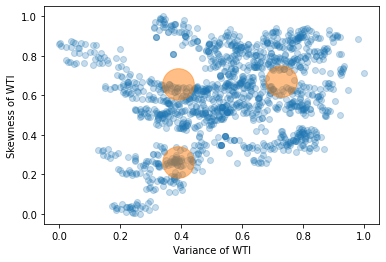

In [36]:
plt.scatter(var1, var2, alpha = 0.25)
plt.scatter(clusters[:,0], clusters[:,1], s=1000, alpha=0.5)

plt.xlabel('Variance of WTI')
plt.ylabel('Skewness of WTI')

## Numpy Correlation Calculation

In [45]:
#Returns a weak positive correlation between the variance of WTI and skewness of WTI

r = np.corrcoef(var1, var2)          #np.corrcoeff returns the correlation matrix, a 2-dimensational array with the corr coeff